In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Change to destination_skewed to generate biased model
df = pd.read_csv('destinations.csv')

print(df.head())

print(df.info())

print(df.isnull().sum())

   Budget Climate Preference  Activities Travel Companions        Language  \
0  Medium               Cold  Relaxation            Couple  Local Language   
1  Medium               Cold  Relaxation            Couple  Local Language   
2  Medium               Cold  Relaxation            Couple  Local Language   
3  Medium               Cold  Relaxation            Couple  Local Language   
4    High               Cold  Relaxation            Couple  Local Language   

          Destination  
0  Kathmandu - Resort  
1  Kathmandu - Resort  
2  Kathmandu - Resort  
3  Kathmandu - Resort  
4  Kathmandu - Resort  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Budget              266 non-null    object
 1   Climate Preference  266 non-null    object
 2   Activities          266 non-null    object
 3   Travel Companions   266 non-null    ob

In [2]:
df['Destination'].value_counts()

Destination
Kathmandu - Resort         20
Tokyo - Hostel             20
London - Hotel             20
Rio de Janeiro - Hostel    20
Tokyo - Hotel              20
Kathmandu - Hostel         20
Rio de Janeiro - Hotel     18
Hammerfest - Hotel         18
Hammerfest - Hostel        16
Bali - Resort              14
Bali - Hostel              12
Kathmandu - Hotel          12
Rio de Janeiro - Resort    10
Bali - Hotel               10
Tokyo - Resort             10
London - Hostel             8
New York City - Hotel       4
Maldives - Hostel           3
New York City - Hostel      2
Cape Town - Resort          2
Cape Town - Hotel           2
Sydney - Hotel              2
Maldives - Resort           2
Maldives - Hotel            1
Name: count, dtype: int64

In [3]:
import pandas as pd

# Specify the destinations and their corresponding sampling fractions
sampling_ratios = {
    'New York City' : 1,
    'Cape Town': 1,
    'Sydney': 1,
    'Maldives': 1
}

# Initialize an empty list to hold the rows to drop
rows_to_drop = []

# Loop through each destination and its corresponding sampling ratio
for destination, ratio in sampling_ratios.items():
    # Filter the rows for the current destination
    destination_rows = df[df['Destination'].str.contains(destination, case=False, na=False)]    
    
    # Check if there are rows to sample from
    if not destination_rows.empty:
        # Sample the specified fraction of rows for the destination
        half_sample = destination_rows.sample(frac=ratio, random_state=42)  # Set random_state for reproducibility
        rows_to_drop.append(half_sample)

# Concatenate the rows to drop into a single DataFrame
rows_to_drop = pd.concat(rows_to_drop)

# Drop the sampled rows from the original DataFrame
df_cleaned = df.drop(rows_to_drop.index)

In [4]:
df_cleaned['Destination'].value_counts()

Destination
Kathmandu - Resort         20
Kathmandu - Hostel         20
Tokyo - Hotel              20
Tokyo - Hostel             20
London - Hotel             20
Rio de Janeiro - Hostel    20
Rio de Janeiro - Hotel     18
Hammerfest - Hotel         18
Hammerfest - Hostel        16
Bali - Resort              14
Kathmandu - Hotel          12
Bali - Hostel              12
Tokyo - Resort             10
Bali - Hotel               10
Rio de Janeiro - Resort    10
London - Hostel             8
Name: count, dtype: int64

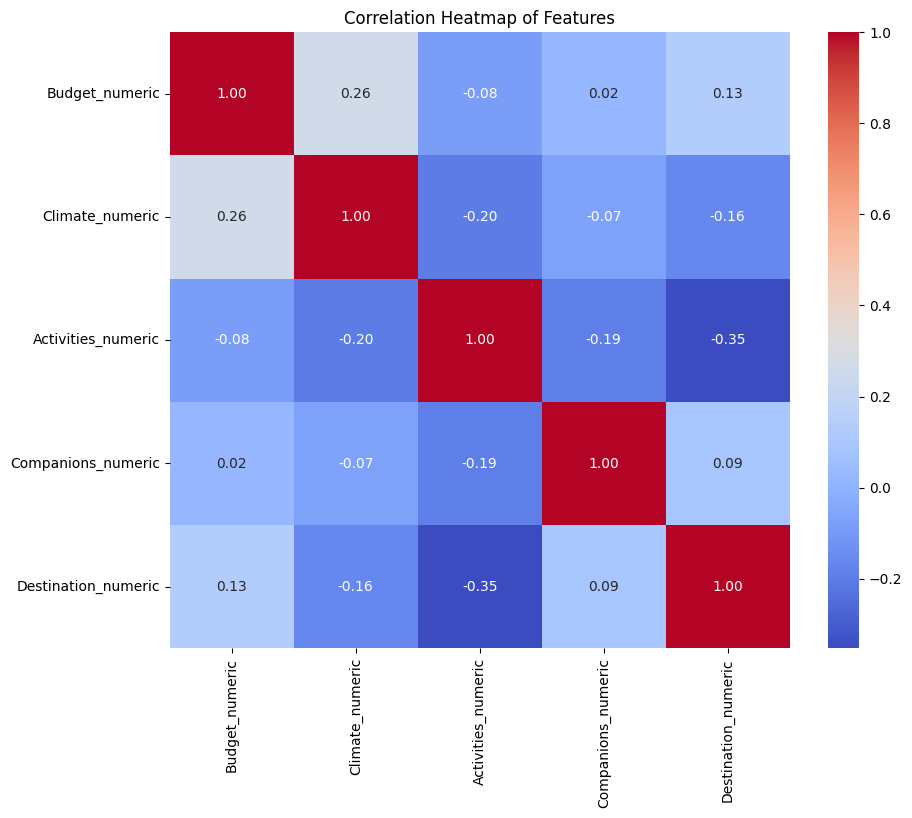

In [5]:
data = pd.DataFrame(df_cleaned)

# Map categorical features to numeric values
budget_map = {"Low": 1, "Medium": 2, "High": 3}
climate_map = {"Tropical": 1, "Temperate": 2, "Cold": 3}
activities_map = {"Adventure": 1, "Sightseeing": 2, "Relaxation": 3}
companions_map = {"Solo": 1, "Couple": 2, "Family": 3, "Friends": 4}
destinations_map = {
    "Bali - Hostel": 0,
    "Bali - Hotel": 1,
    "Bali - Resort": 2,
    "Hammerfest - Hostel": 3,
    "Hammerfest - Hotel": 4,
    "Kathmandu - Hostel": 5,
    "Kathmandu - Hotel": 6,
    "Kathmandu - Resort": 7,
    "London - Hostel": 8,
    "London - Hotel": 9,
    "Rio de Janeiro - Hostel": 10,
    "Rio de Janeiro - Hotel": 11,
    "Rio de Janeiro - Resort": 12,
    "Tokyo - Hostel": 13,
    "Tokyo - Hotel": 14,
    "Tokyo - Resort": 15,
}

# Apply mappings
data['Budget_numeric'] = data['Budget'].map(budget_map)
data['Climate_numeric'] = data['Climate Preference'].map(climate_map)
data['Activities_numeric'] = data['Activities'].map(activities_map)
data['Companions_numeric'] = data['Travel Companions'].map(companions_map)
data['Destination_numeric'] = data['Destination'].map(destinations_map)

# Select numeric columns for correlation
correlation_data = data[['Budget_numeric', 'Climate_numeric', 'Activities_numeric', 'Companions_numeric', 'Destination_numeric']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Features and target
X = data[["Budget_numeric", "Climate_numeric", "Activities_numeric", "Companions_numeric"]]
y = data["Destination"]

# Encode the target variable if it's categorical
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 3: Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=8,
                                        ccp_alpha=0.0001,                                        
                                        random_state=42)
dt_classifier.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy:", accuracy)

scores = cross_val_score(dt_classifier, X, y, cv=5)  # 5-fold cross-validation
print("\nMean Cross-Validation Accuracy:", scores.mean())

Decision Tree Classifier Accuracy: 0.84

Mean Cross-Validation Accuracy: 0.8706938775510202


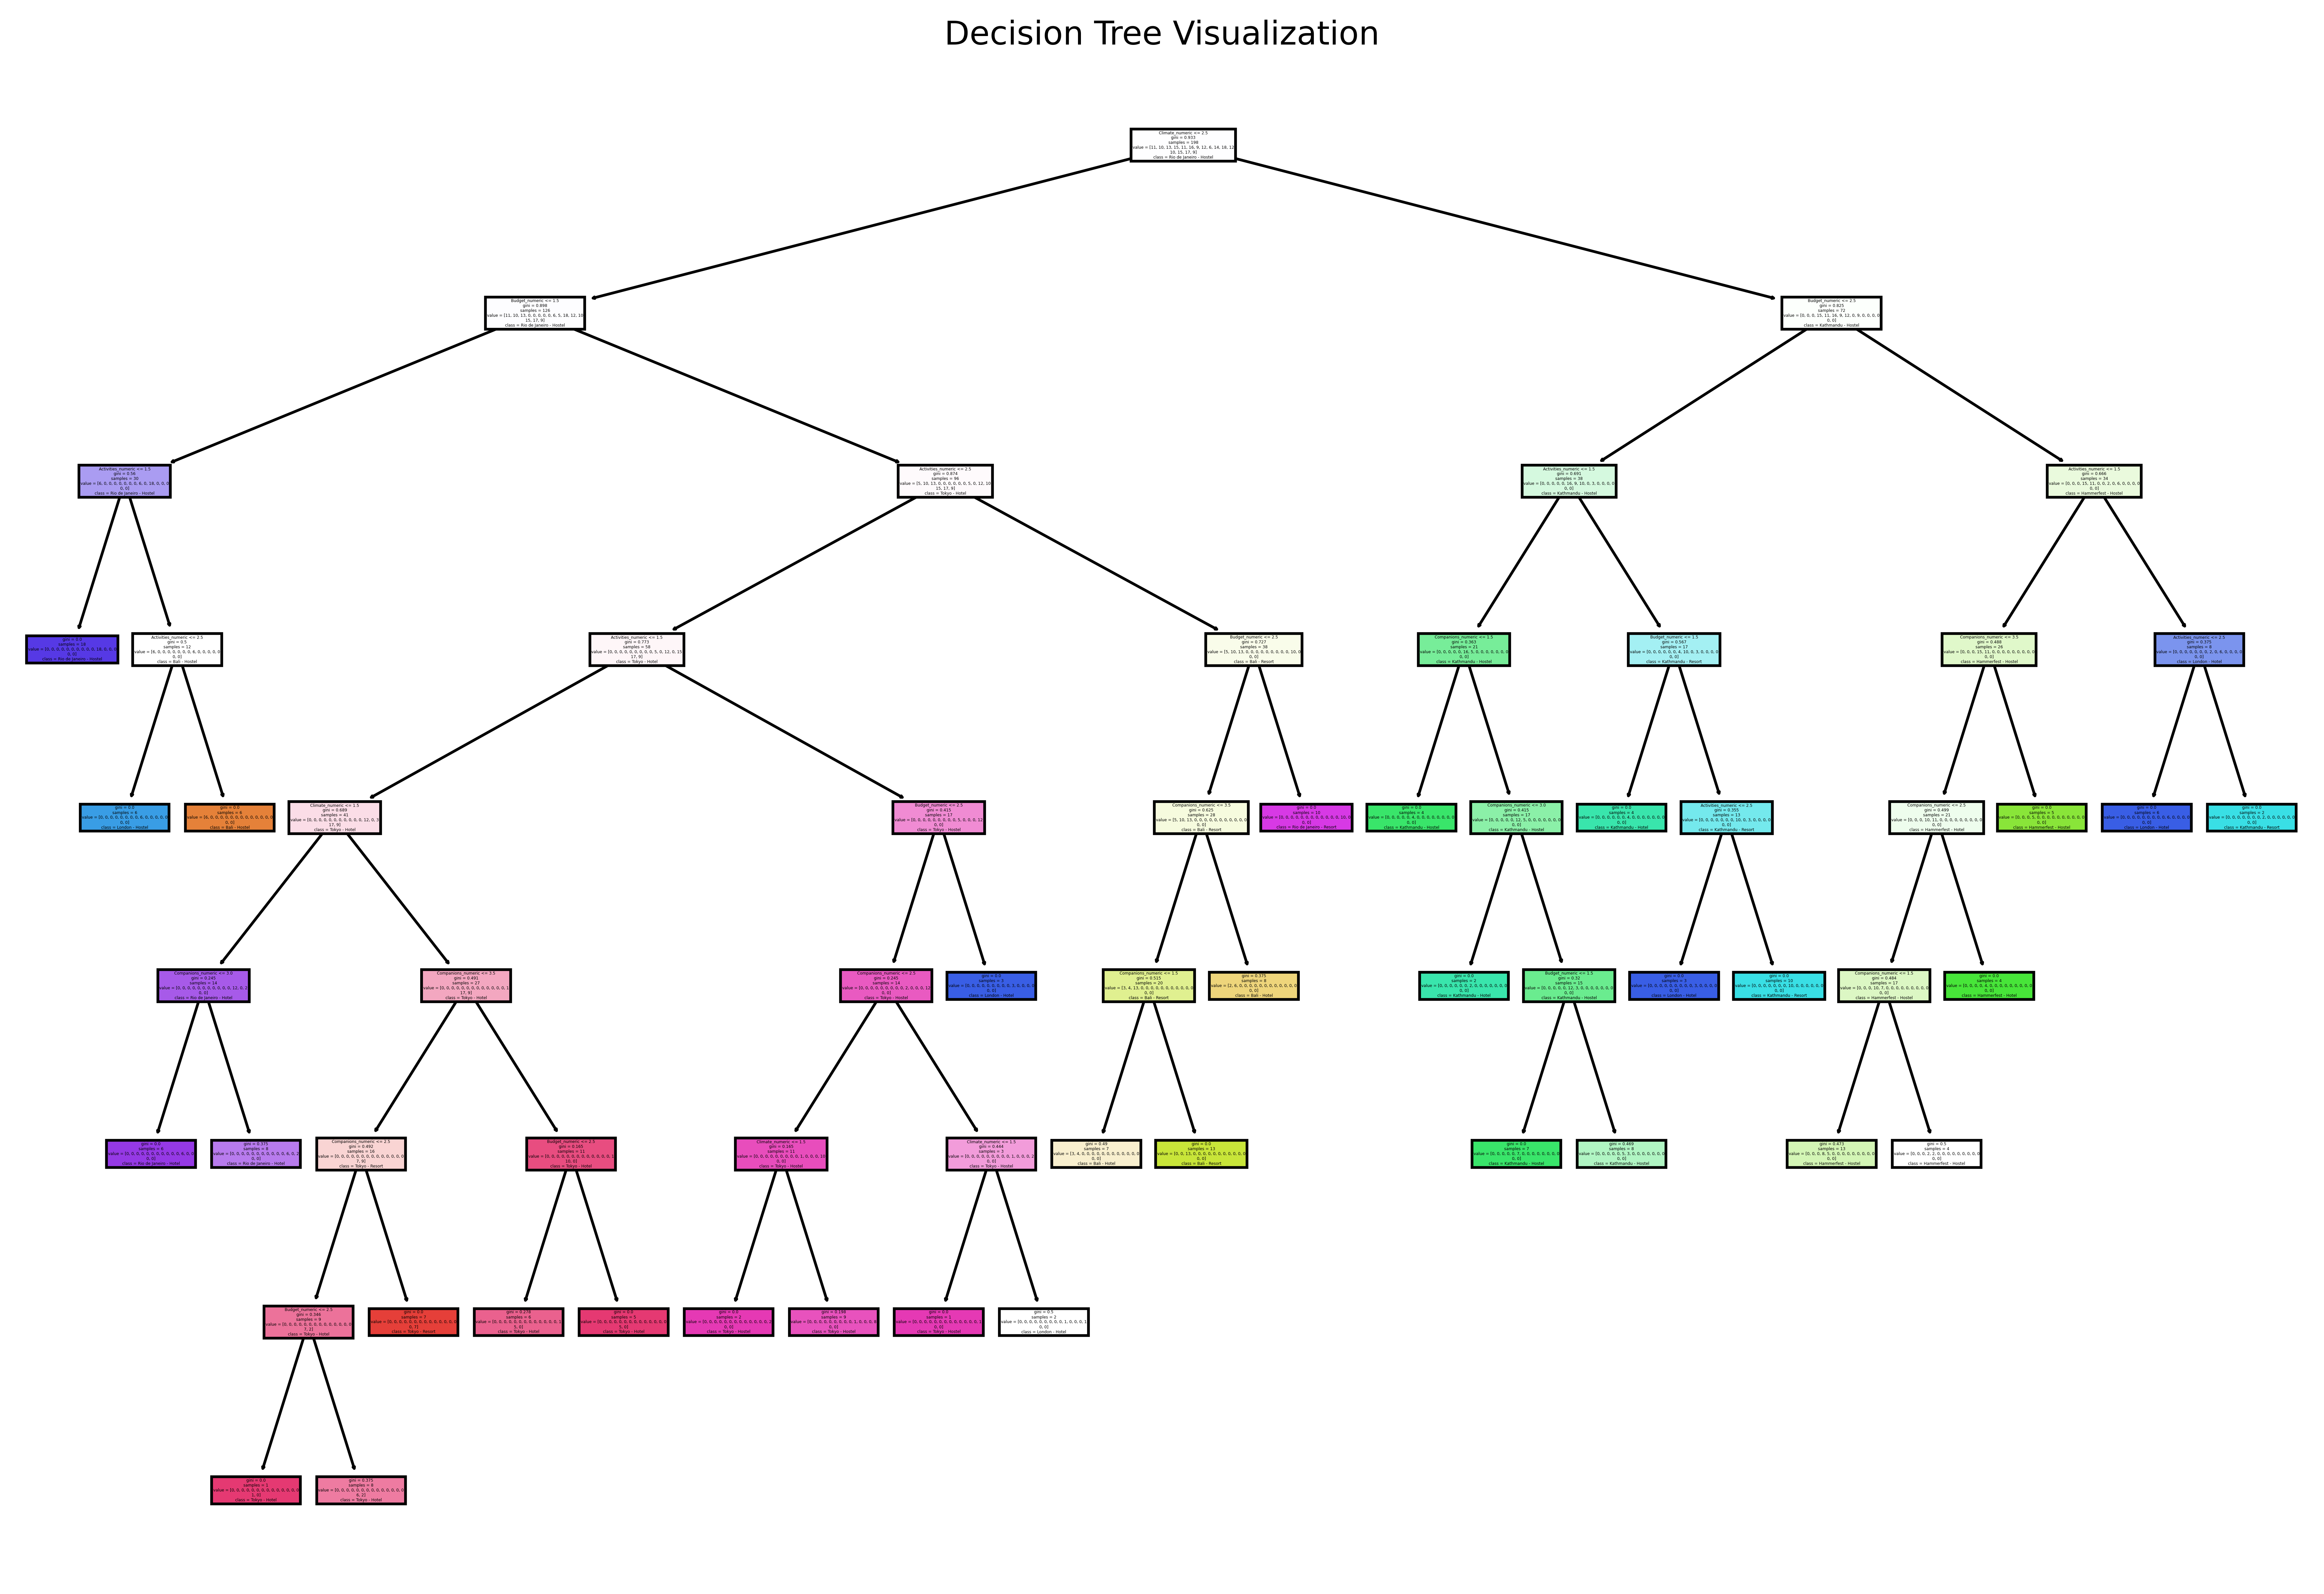

In [7]:
# Step 5: Plot the Decision Tree with higher resolution
plt.figure(figsize=(15, 10), dpi=600)  # Increase figure size and DPI
plot_tree(dt_classifier, feature_names=X.columns, class_names=encoder.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/

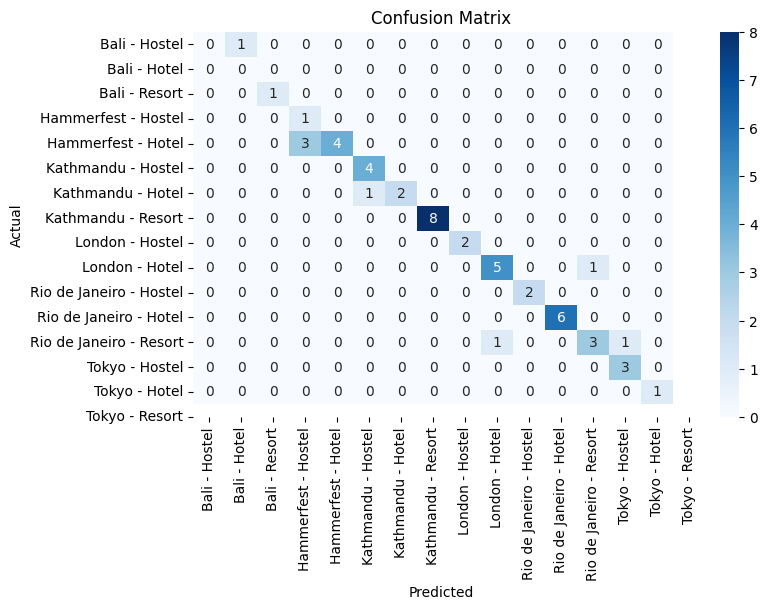

In [8]:
# Evaluate with more metrics
print("\n" + classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Change options below when saving different model

In [9]:
# Save the encoder's classes to decode predictions
np.save("/work/classes.npy", encoder.classes_)

In [10]:
import joblib

# Save the model
joblib.dump(dt_classifier, "/work/NL_Travel_AI.pkl")
print("Model saved as NL_Travel_AI.pkl")

Model saved as NL_Travel_AI.pkl


In [11]:
# Sample input (replace with your own values)
sample_input = [[3, 3, 1, 4]]  # Example: Budget=500, Climate=1, Activities=2, Companions=3

# Make a prediction
predicted_class_encoded = dt_classifier.predict(sample_input)

print(predicted_class_encoded)

# Decode the predicted class back to its original label
predicted_class = encoder.inverse_transform(predicted_class_encoded)

print("Predicted Destination:", predicted_class[0])

[3]
Predicted Destination: Hammerfest - Hostel
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=431329cd-b2ea-4a70-9459-73358578367b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>